<a href="https://colab.research.google.com/github/AmmarBMS/Machine-Learning/blob/main/ML_LAB_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

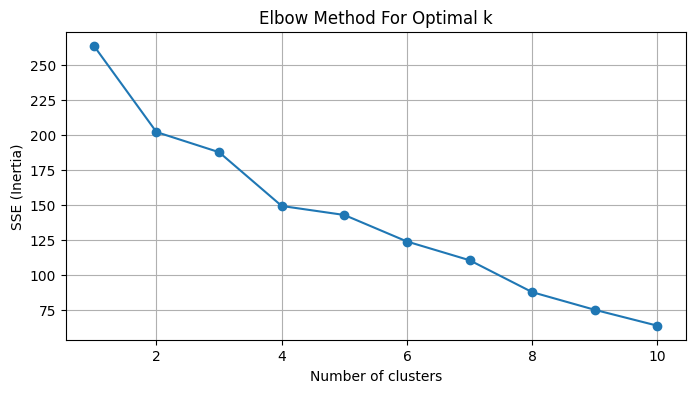

Approximate Clustering Accuracy: 0.78


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt




data = pd.read_csv("/content/diabetes (2).csv")



X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

predictions = kmeans.predict(X_test_scaled)

full_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
true_clusters = full_kmeans.fit_predict(scaler.fit_transform(X))

def map_clusters(true_labels, pred_labels):
    labels = np.zeros_like(pred_labels)
    for i in range(optimal_k):
        mask = (pred_labels == i)
        if np.sum(mask) == 0:
            continue
        labels[mask] = mode(true_labels[mask])[0]
    return labels

mapped_preds = map_clusters(true_clusters[X_test.index], predictions)
accuracy = accuracy_score(true_clusters[X_test.index], mapped_preds)
print(f"Approximate Clustering Accuracy: {accuracy:.2f}")

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
diabetes_df = pd.read_csv("/content/diabetes (2).csv")
X, y = diabetes_df.iloc[:, :-1], diabetes_df["Outcome"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Display results
print("--- Diabetes Dataset ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

--- Diabetes Dataset ---
Accuracy Score: 0.5555555555555556
Confusion Matrix:
 [[1 3]
 [1 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.57      0.80      0.67         5

    accuracy                           0.56         9
   macro avg       0.54      0.53      0.50         9
weighted avg       0.54      0.56      0.52         9

